<a href="https://colab.research.google.com/github/felipeperezleal/nlp-image-description/blob/main/Proyecto_2_Grupo_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Construcción del texto que describe la imagen a partir del archivo JSON
Proyecto 2 — Procesamiento de Lenguaje Natural

- Cardona Carrasquilla Andrés Camilo,
- Pérez Leal Sebastián Felipe
- Quintero Contreras Julián Andrés

Departamento de Ingeniería de Sistemas e Industrial

Universidad Nacional de Colombia

##Carga y Preprocesamiento de los datos

In [ ]:
!unzip jsons_descriptions.zip -d jsons

Archive:  jsons_descriptions.zip
  inflating: jsons/output_1.json     
  inflating: jsons/output_2.json     
  inflating: jsons/output_3.json     
  inflating: jsons/output_925.json   
  inflating: jsons/output_926.json   
  inflating: jsons/output_927.json   
  inflating: jsons/output_928.json   
  inflating: jsons/output_929.json   
  inflating: jsons/output_930.json   
  inflating: jsons/output_931.json   
  inflating: jsons/output_932.json   
  inflating: jsons/output_933.json   
  inflating: jsons/output_934.json   
  inflating: jsons/output_935.json   
  inflating: jsons/output_936.json   
  inflating: jsons/output_937.json   
  inflating: jsons/output_938.json   
  inflating: jsons/output_939.json   
  inflating: jsons/output_940.json   
  inflating: jsons/output_941.json   
  inflating: jsons/output_942.json   
  inflating: jsons/output_943.json   
  inflating: jsons/output_944.json   
  inflating: jsons/output_945.json   
  inflating: jsons/output_946.json   
  inflating: json

In [ ]:
import pandas as pd
import os
import json

In [ ]:
dfs = []

for filename in os.listdir('/content/jsons/'):
  file_path = os.path.join('/content/jsons/', filename)
  df = pd.read_json(file_path, lines=True)
  dfs.append(df)

jsons = pd.concat(dfs, ignore_index=True)
jsons = jsons.dropna()
display(jsons)

,objects,relations,descriptions
0,"[{'id': 0, 'entidad': 'Mujer'}, {'id': 1, 'ent...","[{'type': 'usando', 'obj1': 0, 'obj2': 1}]",[Mujer usando un rodillo de cara]
1,"[{'id': 0, 'entidad': 'agente'}, {'id': 1, 'en...","[{'type': 'muestra', 'obj1': 2, 'obj2': 3}]",[Un agente de bienes raíces que muestra una ca...
2,"[{'id': 0, 'entidad': 'deportista'}, {'id': 1,...","[{'type': 'sentada', 'obj1': 0, 'obj2': 1}, {'...",[Una deportista sentada en el piso]
3,"[{'id': 0, 'entidad': 'Mujer'}, {'id': 1, 'ent...","[{'type': 'cepillándose', 'obj1': 0, 'obj2': 1}]",[Mujer cepillándose los dientes frente a un es...
4,"[{'id': 0, 'entidad': 'Personas'}, {'id': 1, '...","[{'type': 'discuten', 'obj1': 0, 'obj2': 1}, {...",[Personas que discuten en el trabajo]
...,...,...,...
995,"[{'id': 0, 'entidad': 'mujer'}, {'id': 1, 'ent...","[{'type': 'organizando', 'obj1': 0, 'obj2': 1}]",[Una mujer organizando rosas rojas]
996,"[{'id': 0, 'entidad': 'burbujeador'}, {'id': 1...","[{'type': 'sobre', 'obj1': 1, 'obj2': 2}]",[Un burbujeador con agua sobre la mesa]
997,"[{'id': 0, 'entidad': 'Gente'}, {'id': 1, 'ent...","[{'type': 'hablando', 'obj1': 0, 'obj2': 1}]",[Gente hablando juntos]
998,"[{'id': 0, 'entidad': 'Mujer'}, {'id': 1, 'ent...","[{'type': 'sosteniendo', 'obj1': 0, 'obj2': 1}]",[Mujer sosteniendo cerámica]


In [ ]:
!pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 851.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [ ]:
def preprocess_jsons(row):
  descriptions = ''.join(row['descriptions'][0])
  return descriptions

jsons['descriptions'] = jsons.apply(preprocess_jsons, axis=1)
jsons

,objects,relations,descriptions
0,"[{'id': 0, 'entidad': 'Mujer'}, {'id': 1, 'ent...","[{'type': 'usando', 'obj1': 0, 'obj2': 1}]",Mujer usando un rodillo de cara
1,"[{'id': 0, 'entidad': 'agente'}, {'id': 1, 'en...","[{'type': 'muestra', 'obj1': 2, 'obj2': 3}]",Un agente de bienes raíces que muestra una cas...
2,"[{'id': 0, 'entidad': 'deportista'}, {'id': 1,...","[{'type': 'sentada', 'obj1': 0, 'obj2': 1}, {'...",Una deportista sentada en el piso
3,"[{'id': 0, 'entidad': 'Mujer'}, {'id': 1, 'ent...","[{'type': 'cepillándose', 'obj1': 0, 'obj2': 1}]",Mujer cepillándose los dientes frente a un espejo
4,"[{'id': 0, 'entidad': 'Personas'}, {'id': 1, '...","[{'type': 'discuten', 'obj1': 0, 'obj2': 1}, {...",Personas que discuten en el trabajo
...,...,...,...
995,"[{'id': 0, 'entidad': 'mujer'}, {'id': 1, 'ent...","[{'type': 'organizando', 'obj1': 0, 'obj2': 1}]",Una mujer organizando rosas rojas
996,"[{'id': 0, 'entidad': 'burbujeador'}, {'id': 1...","[{'type': 'sobre', 'obj1': 1, 'obj2': 2}]",Un burbujeador con agua sobre la mesa
997,"[{'id': 0, 'entidad': 'Gente'}, {'id': 1, 'ent...","[{'type': 'hablando', 'obj1': 0, 'obj2': 1}]",Gente hablando juntos
998,"[{'id': 0, 'entidad': 'Mujer'}, {'id': 1, 'ent...","[{'type': 'sosteniendo', 'obj1': 0, 'obj2': 1}]",Mujer sosteniendo cerámica


##División de los datos

Separamos los datos en conjuntos de entrenamiento y prueba.

Se utiliza train_test_split para dividir los datos en un 80% para entrenamiento y un 20% para prueba.

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(jsons, test_size=0.2, random_state=42)

In [ ]:
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

In [ ]:
train_data

,objects,relations,descriptions
0,"[{'id': 0, 'entidad': 'mujer'}, {'id': 1, 'ent...","[{'type': 'arreglando', 'obj1': 0, 'obj2': 1},...",Una mujer arreglando su casco espacial
1,"[{'id': 0, 'entidad': 'mujer'}]","[{'type': 'está', 'obj1': 0}, {'type': 'bailan...",La mujer está bailando
2,"[{'id': 0, 'entidad': 'mujer'}, {'id': 1, 'ent...","[{'type': 'espacial', 'obj1': 1}]",Una mujer con casco espacial
3,"[{'id': 0, 'entidad': 'Pareja'}, {'id': 1, 'en...","[{'type': 'sentada', 'obj1': 0, 'obj2': 1}, {'...",Pareja sentada en el piso comiendo pizza juntos
4,"[{'id': 0, 'entidad': 'Mujer'}, {'id': 1, 'ent...","[{'type': 'caminando', 'obj1': 0, 'obj2': 1}, ...",Mujer caminando en la oficina
...,...,...,...
795,"[{'id': 0, 'entidad': 'hombre'}, {'id': 1, 'en...","[{'type': 'tiene', 'obj1': 0, 'obj2': 1}]",Un hombre que tiene una videollamada
796,"[{'id': 0, 'entidad': 'hombre'}, {'id': 1, 'en...","[{'type': 'arreglando', 'obj1': 0, 'obj2': 1}]",Un hombre arreglando un objeto dentro del apar...
797,"[{'id': 0, 'entidad': 'Persona'}, {'id': 1, 'e...","[{'type': 'sosteniendo', 'obj1': 0, 'obj2': 1}]",Persona sosteniendo un teléfono inteligente
798,"[{'id': 0, 'entidad': 'chicas'}, {'id': 1, 'en...","[{'type': 'tocando', 'obj1': 0, 'obj2': 1}]",Dos chicas tocando instrumentos musicales


In [ ]:
def preprocess_data(json_data):
  objects = ", ".join([obj["entidad"] for obj in json_data["objects"]])

  relations = []
  for rel in json_data.get("relations", []):
      if "obj2" in rel:
          relations.append(f"{rel['type']}({rel['obj1']}, {rel['obj2']})")
      else:
          relations.append(f"{rel['type']}({rel['obj1']})")

  # Construir el texto de entrada
  if relations:  # Si hay relaciones, incluirlas en la entrada
      input_text = f"Generar descripción: Objetos: {objects}. Relaciones: {', '.join(relations)}."
  else:  # Si no hay relaciones, solo usar los objetos
      input_text = f"Generar descripción: Objetos: {objects}."

  # Texto objetivo (descripción)
  target_text = json_data["descriptions"]
  return input_text, target_text

# Aplicar preprocesamiento a todos los datos
train_inputs, train_targets = zip(*[preprocess_data(row) for _, row in train_data.iterrows()])
test_inputs, test_targets = zip(*[preprocess_data(row) for _, row in test_data.iterrows()])

In [ ]:
train_inputs

('Generar descripción: Objetos: mujer, casco. Relaciones: arreglando(0, 1), espacial(1).',
 'Generar descripción: Objetos: mujer. Relaciones: está(0), bailando(0).',
 'Generar descripción: Objetos: mujer, casco. Relaciones: espacial(1).',
 'Generar descripción: Objetos: Pareja, piso, juntos. Relaciones: sentada(0, 1), en(0, 1), comiendo(1, 2).',
 'Generar descripción: Objetos: Mujer, oficina. Relaciones: caminando(0, 1), en(0, 1).',
 'Generar descripción: Objetos: fotos.',
 'Generar descripción: Objetos: Gente, reunión. Relaciones: tiene(0, 1).',
 'Generar descripción: Objetos: agente, bienes, raíces, contrato, pareja. Relaciones: explicando(2, 3).',
 'Generar descripción: Objetos: Mujer, vestido. Relaciones: posando(1).',
 'Generar descripción: Objetos: Mujeres, cerveza. Relaciones: bebiendo(0, 1).',
 'Generar descripción: Objetos: familia, pasa.',
 'Generar descripción: Objetos: Persona, nachos. Relaciones: vertiendo(0, 1).',
 'Generar descripción: Objetos: Mujer, teléfono. Relacione

In [ ]:
from transformers import BartForConditionalGeneration, BartTokenizer

# Cargar el modelo y tokenizador de BART
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large")
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large")

config.json:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.02G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

##Tokenización y Creación del Dataset

Convertimos los textos en formatos compatibles con el modelo.

* Se utiliza el tokenizador de BART para tokenizar los textos de entrada y salida.

* Se crea un Dataset personalizado para manejar los datos tokenizados.

In [ ]:
def tokenize_data(inputs, targets, max_length=128):
    model_inputs = tokenizer(
        inputs, max_length=max_length, padding="max_length", truncation=True, return_tensors="pt"
    )
    labels = tokenizer(
        targets, max_length=max_length, padding="max_length", truncation=True, return_tensors="pt"
    ).input_ids
    model_inputs["labels"] = labels
    return model_inputs

# Tokenizar los datos de entrenamiento y prueba
train_encodings = tokenize_data(train_inputs, train_targets)
test_encodings = tokenize_data(test_inputs, test_targets)

In [ ]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, encodings):
        self.encodings = encodings

    def __len__(self):
        return len(self.encodings["input_ids"])

    def __getitem__(self, idx):
        return {
            "input_ids": self.encodings["input_ids"][idx],
            "attention_mask": self.encodings["attention_mask"][idx],
            "labels": self.encodings["labels"][idx],
        }

train_dataset = CustomDataset(train_encodings)
test_dataset = CustomDataset(test_encodings)

##Entrenamiento del modelo

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    save_total_limit=2,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

trainer.train()

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: seperezl (seperezl-universidad-nacional-de-colombia) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss
1,No log,0.255468
2,No log,0.089291
3,No log,0.071965


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:2758: UserWarning: Moving the following attributes in the config to the generation config: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=300, training_loss=1.5400383504231772, metrics={'train_runtime': 344.9135, 'train_samples_per_second': 6.958, 'train_steps_per_second': 0.87, 'total_flos': 650131380633600.0, 'train_loss': 1.5400383504231772, 'epoch': 3.0})

##Generación de Descripciones

Creamos una función para generar descripciones a partir de los jsons de prueba.

In [ ]:
def generate_description(model, tokenizer, input_text, max_length=50):
    model.eval()
    input_encoding = tokenizer(input_text, return_tensors="pt").to(model.device)
    outputs = model.generate(input_ids=input_encoding["input_ids"], max_length=max_length)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

In [ ]:
generated_descriptions = [generate_description(model, tokenizer, input_text) for input_text in test_inputs]
generated_descriptions

['Signo de un regreso en la escuela',
 'Madre y hija mirando los registros de vinilo',
 'Una mujer que aplica una crema hidratante',
 'Un grupo de personas que trabajan',
 'Una persona que escribe en el cuaderno',
 'Compañeros discutiendo con el trabajo sobre el tráfico',
 'Empuje en el tiro de un jarrón de flores de alféizar',
 'Mujeres que usan la computadora portátil',
 'Hombre masculinos en la sesión de fotos de un aire libre',
 'Imágenes de drones de un río',
 'Persona que usa un teléfono inteligente',
 'Proyecto de química',
 'Hombre sosteniendo clientes',
 'Mujer haciendo una parada de manos',
 'Mujeres que hablan suben la escalera espiral',
 'Personas que posan miran la cámara',
 'Gente que trabaja',
 'Cultivar una planta de cannabis',
 'Hombres caminando en la playa de tabla de surf',
 'Mujer posando con una raqueta de tenis',
 'Una mujer que habla mientras sienta',
 'Una temperatura otra mujer',
 'Una persona con un mortero de maja',
 'Agente de bienes raíces recorriendo con 

## Evaluación del Modelo

In [ ]:
!pip install scikit-learn nltk rouge-score meteor

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 82.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 93.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 771.9/771.9 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.1/25.1 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.translate.meteor_score import meteor_score
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer
import nltk

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

###BLEU (Bilingual Evaluation Understudy)

Evalúa la precisión de los n-gramas (secuencias de palabras) en el texto generado en comparación con el texto de referencia.

Cómo funciona:
* Compara los n-gramas (unigramas, bigramas, trigramas, etc.) del texto generado con los del texto de referencia.

* Calcula una puntuación basada en la superposición de estos n-gramas.

* Incluye un factor de penalización por longitud (brevity penalty) para evitar que textos demasiado cortos obtengan puntuaciones altas.

Rango de valores entre 0 y 1, donde:

* 0: No hay superposición entre el texto generado y la referencia. Un BLEU cercano a 1 indica que el texto generado es muy similar a la referencia.

* 1: El texto generado coincide perfectamente con la referencia. Un BLEU cercano a 0 indica que no hay superposición significativa.

> No considera la semántica o el significado del texto.

> Puede ser demasiado estricta con textos que tienen variaciones válidas pero no coinciden exactamente con la referencia.



---



### ROUGE (Recall-Oriented Understudy for Gisting Evaluation)

Evalúa el recall de los n-gramas del texto de referencia en el texto generado.

* ROUGE-1: Evalúa la superposición de unigramas.
* ROUGE-2: Evalúa la superposición de bigramas.
* ROUGE-L: Evalúa la subsecuencia común más larga (LCS, Longest Common Subsequence), que captura la estructura del texto.

Cómo funciona:
* Compara los n-gramas del texto generado con los del texto de referencia.

* Calcula la precisión, recall y F1-score para cada variante.

Rango de valores entre 0 y 1, donde:

* 0: No hay superposición. Un ROUGE cercano a 0 indica que no hay superposición significativa.

* 1: Coincidencia perfecta. Un ROUGE cercano a 1 indica que el texto generado cubre la mayoría de las ideas de la referencia.

> No considera el orden de las palabras ni la semántica.

> Puede favorecer textos generados más largos.



---



### METEOR (Metric for Evaluation of Translation with Explicit ORdering)

Evalúa la similitud entre el texto generado y la referencia considerando precisión, recall, y alineación de palabras basada en sinónimos, raíces y orden.

* Usa un enfoque basado en la alineación de palabras, considerando sinónimos y raíces.

* Incluye una penalización por el orden de las palabras (fragmentation penalty).

* Combina precisión y recall en un F1-score ponderado.

Rango de valores entre 0 y 1, donde:

* 0: No hay similitud. Un METEOR cercano a 0 indica que no hay similitud significativa.

* 1: Coincidencia perfecta. Un METEOR cercano a 1 indica que el texto generado es semánticamente similar a la referencia.

> Considera sinónimos y raíces, lo que la hace más flexible que BLEU y ROUGE.

> Captura mejor la semántica y el significado del texto.

In [ ]:
# BLEU
bleu_scores = [sentence_bleu([target.split()], generated.split()) for generated, target in zip(generated_descriptions, test_targets)]
avg_bleu = sum(bleu_scores) / len(bleu_scores)

# ROUGE
scorer = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)
rouge_scores = [scorer.score(generated, target) for generated, target in zip(generated_descriptions, test_targets)]

# METEOR
meteor_scores = [meteor_score([target.split()], generated.split()) for generated, target in zip(generated_descriptions, test_targets)]
avg_meteor = sum(meteor_scores) / len(meteor_scores)

scores = []
for i, (generated, target) in enumerate(zip(generated_descriptions, test_targets)):
    scores.append({
        "Generado": generated,
        "Referencia": target,
        "BLEU": bleu_scores[i],
        "ROUGE_1": rouge_scores[i]["rouge1"].fmeasure,
        "ROUGE_2": rouge_scores[i]["rouge2"].fmeasure,
        "ROUGE_L": rouge_scores[i]["rougeL"].fmeasure,
        "METEOR": meteor_scores[i]
    })

df_scores = pd.DataFrame(scores)
display(df_scores)

/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

,Generado,Referencia,BLEU,ROUGE_1,ROUGE_2,ROUGE_L,METEOR
0,Signo de un regreso en la escuela,Signo de regreso a la escuela,1.041981e-154,0.769231,0.363636,0.769231,0.731148
1,Madre y hija mirando los registros de vinilo,Madre e hija mirando los registros de vinilo,7.071068e-01,0.875000,0.714286,0.875000,0.864796
2,Una mujer que aplica una crema hidratante,Una mujer que aplica la crema hidratante,4.889230e-01,0.857143,0.666667,0.857143,0.803571
3,Un grupo de personas que trabajan,Un grupo de personas que trabajan,1.000000e+00,1.000000,1.000000,1.000000,0.997685
4,Una persona que escribe en el cuaderno,Una persona que escribe en su cuaderno,6.434589e-01,0.857143,0.666667,0.857143,0.841270
...,...,...,...,...,...,...,...
195,Hombre sosteniendo una vela,Soplando la luz de la vela,7.813508e-232,0.200000,0.000000,0.200000,0.086207
196,Una mujer con guantes,Una mujer con guantes,1.000000e+00,1.000000,1.000000,1.000000,0.992188
197,Un burbujeador posando para una casa,Un burbujeador utilizado para fumar marihuana,8.388266e-155,0.500000,0.200000,0.500000,0.425926
198,Persona sosteniendo una roca,Persona sosteniendo una roca,1.000000e+00,1.000000,1.000000,1.000000,0.992188


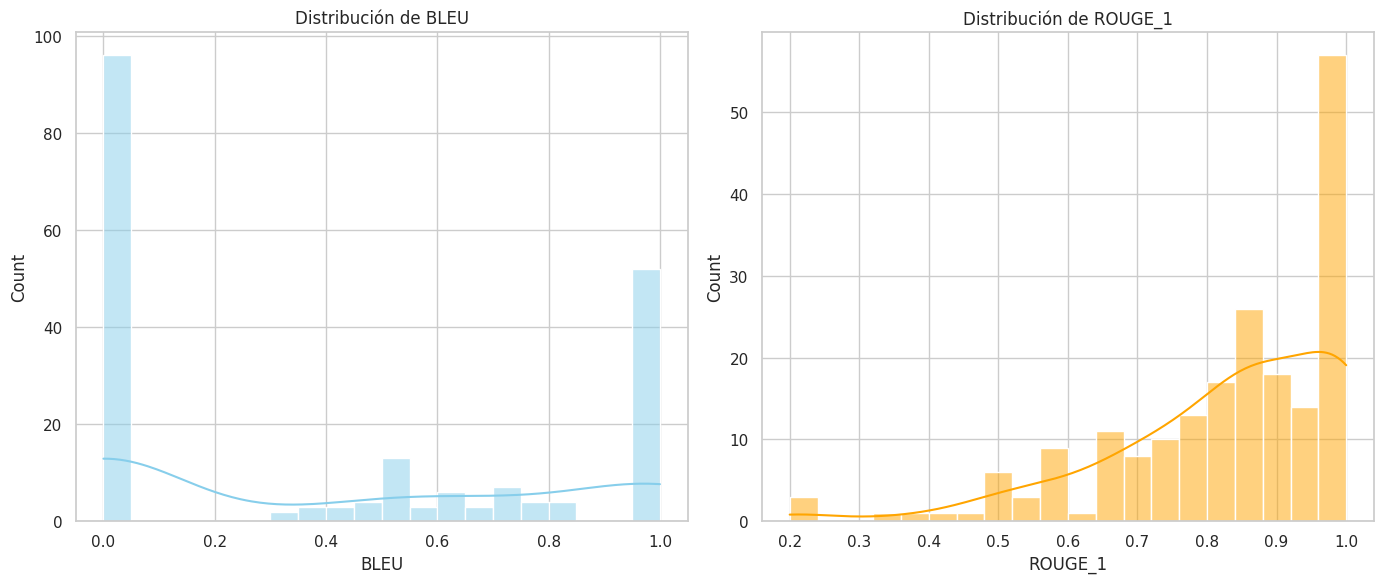

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df_scores['BLEU'], kde=True, ax=axes[0], color="skyblue", bins=20)
axes[0].set_title("Distribución de BLEU")

sns.histplot(df_scores['ROUGE_1'], kde=True, ax=axes[1], color="orange", bins=20)
axes[1].set_title("Distribución de ROUGE_1")

plt.tight_layout()
plt.show()

In [ ]:
valores_bleu = df_scores['BLEU'].unique()
print("Valores únicos en BLEU:", valores_bleu)

Valores únicos en BLEU: [1.04198122e-154 7.07106781e-001 4.88923022e-001 1.00000000e+000
 6.43458884e-001 9.69672790e-155 6.23898607e-001 5.00860540e-078
 7.26212318e-078 1.22133867e-077 8.45192927e-232 4.48737597e-078
 8.22183377e-078 8.75127398e-078 5.30594861e-078 8.44484326e-078
 6.73182138e-001 6.39749532e-155 8.28657167e-155 4.63077716e-001
 6.14725456e-078 6.72585483e-078 1.21833248e-231 6.20602175e-078
 4.31670011e-001 8.40896415e-001 7.38024522e-078 9.03270495e-155
 1.60341572e-231 7.59835686e-001 7.07069678e-078 7.18939338e-001
 5.81918611e-155 8.21454660e-155 1.05476866e-154 5.96949179e-001
 1.64621104e-231 9.45394640e-155 1.53197199e-231 5.70533676e-078
 3.57388011e-001 5.44620639e-078 1.18628001e-154 8.46481725e-001
 6.12975241e-001 5.50695315e-001 5.00000000e-001 9.59421593e-155
 7.78800783e-001 3.76849916e-001 5.37284966e-001 4.94712631e-078
 6.64644478e-155 6.86809206e-078 3.15846209e-001 5.16973154e-001
 4.27287006e-001 5.86358675e-078 5.47346103e-078 3.81633091e-001
 

In [ ]:
low_bleu = df_scores[df_scores['BLEU'] < 1e-10]
print("Casos con métrica BLEU cercanos a 0:", len(low_bleu))
display(low_bleu)

Casos con métrica BLEU cercanos a 0: 96


,Generado,Referencia,BLEU,ROUGE_1,ROUGE_2,ROUGE_L,METEOR
0,Signo de un regreso en la escuela,Signo de regreso a la escuela,1.041981e-154,0.769231,0.363636,0.769231,0.731148
5,Compañeros discutiendo con el trabajo sobre el...,Compañeros de trabajo discutiendo sobre el tra...,9.696728e-155,0.666667,0.375000,0.555556,0.523944
8,Hombre masculinos en la sesión de fotos de un ...,Modelos masculinos en una sesión de fotos al a...,5.008605e-78,0.695652,0.476190,0.695652,0.566781
10,Persona que usa un teléfono inteligente,Persona que usa teléfono inteligente,7.262123e-78,0.923077,0.727273,0.923077,0.949020
11,Proyecto de química,Proyecto de química,1.221339e-77,1.000000,1.000000,1.000000,0.981481
...,...,...,...,...,...,...,...
185,Empresarios que discuen usan una tableta,Empleados que discuen mientras usan tableta,9.013779e-155,0.666667,0.200000,0.666667,0.526042
188,Planta de cannabis rocía de agua,Planta de cannabis que se rocía con agua,4.701928e-78,0.750000,0.428571,0.750000,0.320513
189,Hombres jugando videojuegos,Hombres jugando videojuegos,1.221339e-77,1.000000,1.000000,1.000000,0.981481
195,Hombre sosteniendo una vela,Soplando la luz de la vela,7.813508e-232,0.200000,0.000000,0.200000,0.086207


In [ ]:
high_bleu = df_scores[df_scores['BLEU'] == 1]
print("Casos con métrica BLEU iguales a 1:", len(high_bleu))
display(high_bleu)

Casos con métrica BLEU iguales a 1: 52


,Generado,Referencia,BLEU,ROUGE_1,ROUGE_2,ROUGE_L,METEOR
3,Un grupo de personas que trabajan,Un grupo de personas que trabajan,1.0,1.0,1.0,1.0,0.997685
7,Mujeres que usan la computadora portátil,Mujeres que usan la computadora portátil,1.0,1.0,1.0,1.0,0.997685
9,Imágenes de drones de un río,Imágenes de drones de un río,1.0,1.0,1.0,1.0,0.997685
13,Mujer haciendo una parada de manos,Mujer haciendo una parada de manos,1.0,1.0,1.0,1.0,0.997685
17,Cultivar una planta de cannabis,Cultivar una planta de cannabis,1.0,1.0,1.0,1.0,0.996000
26,Una persona que sostiene una pelota de discoteca,Una persona que sostiene una pelota de discoteca,1.0,1.0,1.0,1.0,0.999023
39,Un hombre que sostiene una señal,Un hombre que sostiene una señal,1.0,1.0,1.0,1.0,0.997685
40,Una doctora revisando la presión arterial de u...,Una doctora revisando la presión arterial de u...,1.0,1.0,1.0,1.0,0.999314
50,Mujer con vestido negro y tacones,Mujer con vestido negro y tacones,1.0,1.0,1.0,1.0,0.997685
52,Hombre y mujer que coleccionan basura,Hombre y mujer que coleccionan basura,1.0,1.0,1.0,1.0,0.997685


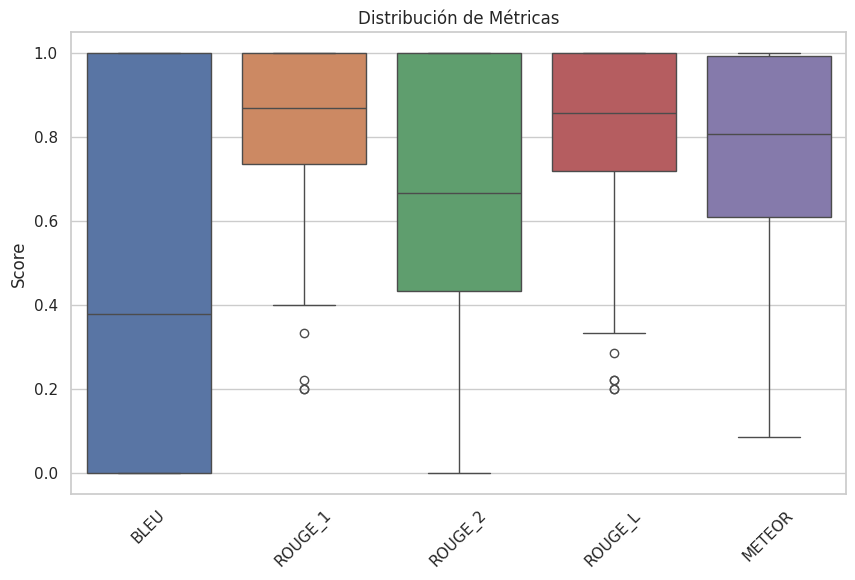

In [ ]:
  plt.figure(figsize=(10, 6))
  sns.boxplot(data=df_scores[['BLEU', 'ROUGE_1', 'ROUGE_2', 'ROUGE_L', 'METEOR']])
  plt.title('Distribución de Métricas')
  plt.ylabel('Score')
  plt.xticks(rotation=45)
  plt.show()

<ipython-input-95-4cd6fc2c4590>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_scores.index, y=avg_scores.values, palette='viridis')


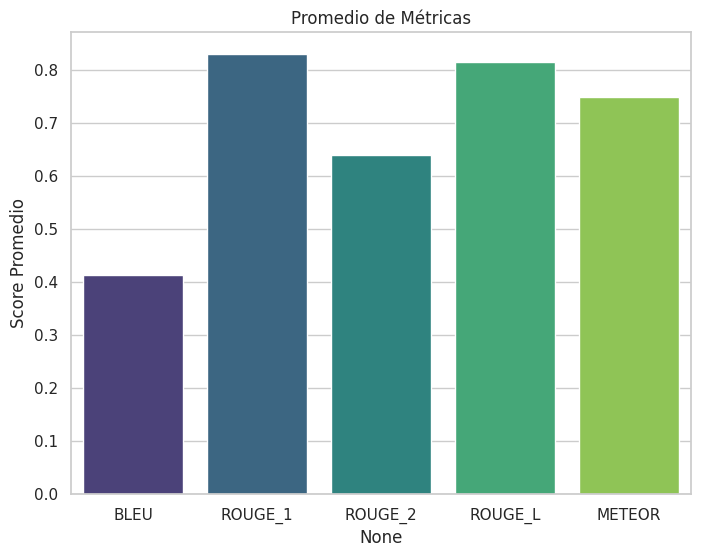

In [ ]:
avg_scores = df_scores[['BLEU', 'ROUGE_1', 'ROUGE_2', 'ROUGE_L', 'METEOR']].mean()
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_scores.index, y=avg_scores.values, palette='viridis')
plt.title('Promedio de Métricas')
plt.ylabel('Score Promedio')
plt.show()

In [ ]:
for i in range(20):
    print(f"Ejemplo {i+1}:")
    print(f"Generado: {df_scores['Generado'][i]}")
    print(f"Original: {df_scores['Referencia'][i]}")
    print(f"BLEU: {df_scores['BLEU'][i]:.2f}, ROUGE-1: {df_scores['ROUGE_1'][i]:.2f}, METEOR: {df_scores['METEOR'][i]:.2f}")
    print("-" * 50)

Ejemplo 1:
Generado: Signo de un regreso en la escuela
Original: Signo de regreso a la escuela
BLEU: 0.00, ROUGE-1: 0.77, METEOR: 0.73
--------------------------------------------------
Ejemplo 2:
Generado: Madre y hija mirando los registros de vinilo
Original: Madre e hija mirando los registros de vinilo
BLEU: 0.71, ROUGE-1: 0.88, METEOR: 0.86
--------------------------------------------------
Ejemplo 3:
Generado: Una mujer que aplica una crema hidratante
Original: Una mujer que aplica la crema hidratante
BLEU: 0.49, ROUGE-1: 0.86, METEOR: 0.80
--------------------------------------------------
Ejemplo 4:
Generado: Un grupo de personas que trabajan
Original: Un grupo de personas que trabajan
BLEU: 1.00, ROUGE-1: 1.00, METEOR: 1.00
--------------------------------------------------
Ejemplo 5:
Generado: Una persona que escribe en el cuaderno
Original: Una persona que escribe en su cuaderno
BLEU: 0.64, ROUGE-1: 0.86, METEOR: 0.84
--------------------------------------------------
Ejemplo

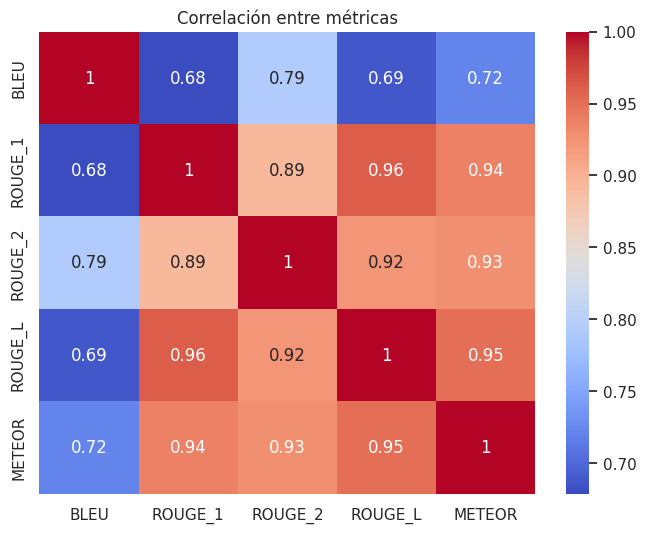

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_scores[['BLEU', 'ROUGE_1', 'ROUGE_2', 'ROUGE_L', 'METEOR']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre métricas')
plt.show()

La mayoría de los valores son cercanos a 1 lo que indica una correlación positiva fuerte entre las métricas. Sin embargo BLEU es la que más difiere con las demás. Recordemos que BLEU se enfoca en la precisión de n-gramas (coincidencia exacta de palabras/frases), ROUGE se enfoca en el recall de n-gramas (cobertura de ideas o palabras clave) y METEOR en la semántica de la frase.